In [27]:
import pandas as pd
import numpy as np

In [28]:
dataset = pd.read_csv('noshowappointments.csv')

In [29]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
dataset.shape

(110527, 14)

In [31]:
dataset['PatientId'].nunique()

62299

In [32]:
dataset['Neighbourhood'].nunique()

81

In [33]:
dataset = dataset[(dataset['Age']>0) & (dataset['Age']<100)]

In [34]:
dataset['Age'].min()

1

In [35]:
dataset['Age'].max()

99

In [36]:
dataset['ScheduledDay']=pd.to_datetime(dataset['ScheduledDay'],infer_datetime_format=True)

In [37]:
type(dataset['ScheduledDay'])

pandas.core.series.Series

In [38]:
dataset['AppointmentDay']=pd.to_datetime(dataset['AppointmentDay'],infer_datetime_format=True)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106976 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106976 non-null float64
AppointmentID     106976 non-null int64
Gender            106976 non-null object
ScheduledDay      106976 non-null datetime64[ns]
AppointmentDay    106976 non-null datetime64[ns]
Age               106976 non-null int64
Neighbourhood     106976 non-null object
Scholarship       106976 non-null int64
Hipertension      106976 non-null int64
Diabetes          106976 non-null int64
Alcoholism        106976 non-null int64
Handcap           106976 non-null int64
SMS_received      106976 non-null int64
No-show           106976 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.2+ MB


In [40]:
dataset['AwaitingTime']=(dataset['AppointmentDay'].sub(dataset['ScheduledDay'],axis=0))

In [41]:
dataset["AwaitingTime"] = (dataset["AwaitingTime"] / np.timedelta64(1, 'D')).abs()

In [42]:
dataset.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.776481
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.672535
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.679907
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.728831
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.671794


In [43]:
dataset['No-show'].replace("No", 0,inplace=True)
dataset['No-show'].replace("Yes", 1,inplace=True)

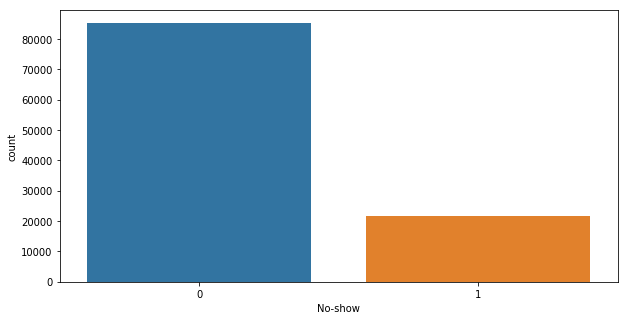

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x='No-show',data=dataset)



In [45]:
import numpy as np
# dataset['No-show'].value_counts().to_csv("./patientnoshowcount.csv")

In [46]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.776481
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.672535
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.679907
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.728831
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.671794


In [47]:
dataset = pd.get_dummies(dataset,columns=['Gender','Neighbourhood','Age'])

In [48]:
dataset.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,Age_90,Age_91,Age_92,Age_93,Age_94,Age_95,Age_96,Age_97,Age_98,Age_99
0,2.987250e+13,5642903,2016-04-29 18:38:08,2016-04-29,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29 16:08:27,2016-04-29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29 16:19:04,2016-04-29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,2016-04-29 17:29:31,2016-04-29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,2016-04-29 16:07:23,2016-04-29,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dataset = dataset.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)

In [50]:
X = dataset.drop('No-show',axis=1)
y = dataset['No-show'].values

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_S = scaler.fit_transform(X)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV

X_train,X_test,y_train,y_test = train_test_split(X_S,y, test_size=0.3,random_state=42)

In [53]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
# print("Best score using built-in LassoCV: %f" %reg.score(X_test.reshape(-1,1),y_test))
coef = pd.Series(reg.coef_, index = X.columns)

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.000910


In [54]:
inter = coef[coef!=0]

In [55]:
inter = inter.sort_values(ascending=False)

In [56]:
inter.head(10)

AwaitingTime                   0.066928
SMS_received                   0.025436
Neighbourhood_ITARARÉ          0.008060
Age_14                         0.007291
Neighbourhood_SANTOS DUMONT    0.007076
Age_13                         0.006983
Age_25                         0.006982
Scholarship                    0.006932
Age_17                         0.006714
Age_9                          0.006361
dtype: float64

In [57]:
inter.tail(10)

Age_73                          -0.004684
Neighbourhood_JABOUR            -0.004732
Age_64                          -0.004912
Neighbourhood_SOLON BORGES      -0.005180
Age_63                          -0.005309
Neighbourhood_SANTA MARTHA      -0.005312
Hipertension                    -0.005382
Neighbourhood_JARDIM DA PENHA   -0.005563
Age_69                          -0.005971
Neighbourhood_JARDIM CAMBURI    -0.008591
dtype: float64

In [62]:
# inter.to_csv('./patientdatacoeff.csv')
y_pred = reg.predict(X_test)

In [66]:
y_pred = [0 if x < 0.5 else 1 for x in y_pred ]

In [160]:
print("Best score using built-in LassoCV: %f" %reg.score(X_test,y_test))

Best score using built-in LassoCV: 0.044853


In [67]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test)

0.016933776837012398